In [1]:
## jupyter notebook --notebook-dir=z:\lafe 
from MS461xx_RawSockets_example import *
import pyvisa
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import time
import datetime
import serial

In [3]:
shockline_socket = InstrumentSocketConnection('* TCPIP0::132.163.130.56::5001::SOCKET', 30)

In [4]:
shockline_socket.query("*IDN?")

'ANRITSU,MS46122B,2250307,V2023.7.5,V2.3.20'

In [5]:
import serial.tools.list_ports
ports = serial.tools.list_ports.comports()

for port, desc, hwid in sorted(ports):
        print("{}: {} [{}]".format(port, desc, hwid))

COM1: Communications Port (COM1) [ACPI\PNP0501\0]
COM3: Intel(R) Active Management Technology - SOL (COM3) [PCI\VEN_8086&DEV_A2BD&SUBSYS_07381028&REV_00\3&11583659&1&B3]
COM4: Arduino Uno (COM4) [USB VID:PID=2341:0043 SER=7503330323435151C020 LOCATION=1-10.1.2]
COM5: USB Serial Device (COM5) [USB VID:PID=3343:0043 SER=851363038373519150A0 LOCATION=1-10.1.1]


In [6]:
Sparameter_select_serial = serial.Serial('COM4', 9600)  # open serial port

In [7]:
SP9T_serial = serial.Serial('COM5', 9600)  # open serial port

In [9]:
Sparameter_select_serial.write(bytes(str(1), encoding='utf-8'))

1

In [14]:
SP9T_serial.write(bytes(str(8), encoding='utf-8'))

1

In [18]:
Sparameter_select_serial.write(bytes(str(1), encoding='utf-8'))

1

In [21]:
# Take all 4 S parameters on all 9 devices

# Get frequency points and turn them into a array
fstring = shockline_socket.query(":SENS1:FREQ:DATA?")
fstringarray = fstring.split(' ')[1:len(fstring.split(' '))]
frequency = []
for index in range(len(fstringarray)):
    frequency.append(float(fstringarray[index]))
frequency = np.array(frequency)


# set switch state to select S paramater
Sparameter_select_serial.write(bytes(str(1), encoding='utf-8')) # S11
time.sleep(2.0)
# get the data from the one trace, real and imaginary parts
datastring = shockline_socket.query(":CALC1:PAR1:DATA:SDAT?")
datastringarray = datastring.split('\n')
datastringarray[0] = datastringarray[0].split('#9000029999')[1]# why is this mysterious long number always inserted?
S11_real = []
S11_imag = []
for index in range(len(datastringarray)):
    r1 = float(datastringarray[index].split(',')[0])
    i1 = float(datastringarray[index].split(',')[1])
    S11_real.append(r1)
    S11_imag.append(i1)

S11_real = np.array(S11_real)
S11_imag = np.array(S11_imag)

time.sleep(2.0)
# set switch state to select S paramater
Sparameter_select_serial.write(bytes(str(2), encoding='utf-8')) # S22
time.sleep(2.0)
# get the data from the one trace, real and imaginary parts
datastring = shockline_socket.query(":CALC1:PAR1:DATA:SDAT?")
datastringarray = datastring.split('\n')
datastringarray[0] = datastringarray[0].split('#9000029999')[1]# why is this mysterious long number always inserted?
S22_real = []
S22_imag = []
for index in range(len(datastringarray)):
    r1 = float(datastringarray[index].split(',')[0])
    i1 = float(datastringarray[index].split(',')[1])
    S22_real.append(r1)
    S22_imag.append(i1)

S22_real = np.array(S22_real)
S22_imag = np.array(S22_imag)

# set switch state to select S paramater
time.sleep(2.0)
Sparameter_select_serial.write(bytes(str(3), encoding='utf-8')) # S21
time.sleep(2.0)
# get the data from the one trace, real and imaginary parts
datastring = shockline_socket.query(":CALC1:PAR1:DATA:SDAT?")
datastringarray = datastring.split('\n')
datastringarray[0] = datastringarray[0].split('#9000029999')[1]# why is this mysterious long number always inserted?
S21_real = []
S21_imag = []
for index in range(len(datastringarray)):
    r1 = float(datastringarray[index].split(',')[0])
    i1 = float(datastringarray[index].split(',')[1])
    S21_real.append(r1)
    S21_imag.append(i1)

S21_real = np.array(S21_real)
S21_imag = np.array(S21_imag)

# set switch state to select S paramater
time.sleep(2.0)
Sparameter_select_serial.write(bytes(str(4), encoding='utf-8')) # S12
time.sleep(2.0)
# get the data from the one trace, real and imaginary parts
datastring = shockline_socket.query(":CALC1:PAR1:DATA:SDAT?")
datastringarray = datastring.split('\n')
datastringarray[0] = datastringarray[0].split('#9000029999')[1]# why is this mysterious long number always inserted?
S12_real = []
S12_imag = []
for index in range(len(datastringarray)):
    r1 = float(datastringarray[index].split(',')[0])
    i1 = float(datastringarray[index].split(',')[1])
    S12_real.append(r1)
    S12_imag.append(i1)

S12_real = np.array(S12_real)
S12_imag = np.array(S12_imag)

S11_complex = S11_real + 1j*S11_imag
S22_complex = S22_real + 1j*S22_imag
S21_complex = S21_real + 1j*S21_imag
S12_complex = S12_real + 1j*S12_imag
S11_logmag = 10*np.log10(S11_real*S11_real + S11_imag*S11_imag)
S22_logmag = 10*np.log10(S22_real*S22_real + S22_imag*S22_imag)
S21_logmag = 10*np.log10(S21_real*S21_real + S21_imag*S21_imag)
S12_logmag = 10*np.log10(S12_real*S12_real + S12_imag*S12_imag)
S11_phase = np.unwrap(np.angle(S11_complex,deg=True))
S22_phase = np.unwrap(np.angle(S22_complex,deg=True))
S21_phase = np.unwrap(np.angle(S21_complex,deg=True))
S12_phase = np.unwrap(np.angle(S12_complex,deg=True))


In [41]:
shockline_socket.write(":SENS1:BAND 1e3")
IFBW = shockline_socket.query(":SENS1:BAND?")
IFBW

'1.00000000000E+003'

In [30]:
S11_complex = S11_real + 1j*S11_imag

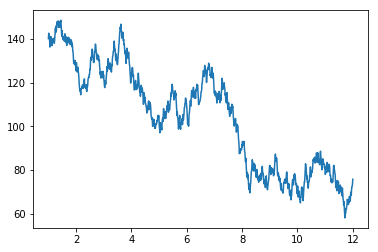

In [36]:
plt.plot(frequency/1e9,np.unwrap(np.angle(S11_complex,deg=True)))
plt.grid()
plt.xlabel('Frequency [GHz]')
plt.ylabel('$|S_{xx}|^2$ [dB]')
plt.ylim((-60,0))
plt.xlim((1,15))
plt.legend(['$|S_{11}|^2$','$|S_{22}|^2$','$|S_{21}|^2$','$|S_{12}|^2$'])

(1.0, 12.0)

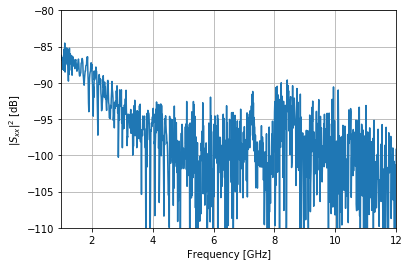

In [19]:
# Get frequency points and turn them into a array
fstring = shockline_socket.query(":SENS1:FREQ:DATA?")
fstringarray = fstring.split(' ')[1:len(fstring.split(' '))]
frequency = []
for index in range(len(fstringarray)):
    frequency.append(float(fstringarray[index]))
frequency = np.array(frequency)
# get the data from the one trace, real and imaginary parts
datastring = shockline_socket.query(":CALC1:PAR1:DATA:SDAT?")
datastringarray = datastring.split('\n')
datastringarray[0] = datastringarray[0].split('#9000029999')[1]# why is this mysterious long number always inserted?

# we use Sxx because while we're just measuring S21 on the Anritsu VNA
Sxx_real = []
Sxx_imag = []

for index in range(len(datastringarray)):
    r1 = float(datastringarray[index].split(',')[0])
    i1 = float(datastringarray[index].split(',')[1])
    Sxx_real.append(r1)
    Sxx_imag.append(i1)

Sxx_real = np.array(Sxx_real)
Sxx_imag = np.array(Sxx_imag)
plt.plot(frequency/1e9,10*np.log10(Sxx_real*Sxx_real + Sxx_imag*Sxx_imag)) 
plt.xlabel('Frequency [GHz]')
plt.ylabel('$|S_{xx}|^2$ [dB]')
plt.ylim((-110,-80))
plt.grid()
plt.xlim((frequency[0]/1e9,frequency[len(frequency) - 1]/1e9))